In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import time
import cv2

from joblib import Parallel, delayed

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from data_manager import *
from metadata import *

import matplotlib.pyplot as plt
%matplotlib inline

Setting environment for Gordon


In [2]:
from skimage.filters import threshold_otsu
from scipy.ndimage import label
from scipy.ndimage.morphology import distance_transform_edt
from skimage.feature import peak_local_max
from skimage.morphology import watershed, binary_dilation, disk
from skimage.segmentation import mark_boundaries, find_boundaries
from skimage.measure import regionprops
from sklearn.cluster import KMeans

In [15]:
labelmap = imread('/oasis/projects/nsf/csd395/yuncong/brainstem_cellProfiler_outline_grayscale.png')

In [45]:
from registration_utilities import *
blob_outlines = {l: coords_list[0] for l, coords_list in find_contour_points(labelmap, sample_every=1).iteritems()}
outlines_all = np.concatenate(blob_outlines.values())

In [51]:
im = imread('/oasis/projects/nsf/csd395/yuncong/CSHL_cells/example/brainstem.png', True)
im_boundaryMarked = gray2rgb(im)
im_boundaryMarked[outlines_all[:,1], outlines_all[:,0]] = (1,0,0)

In [49]:
display_image(im_boundaryMarked)

/oasis/projects/nsf/csd395/yuncong/Brain/cells/tmp.jpg

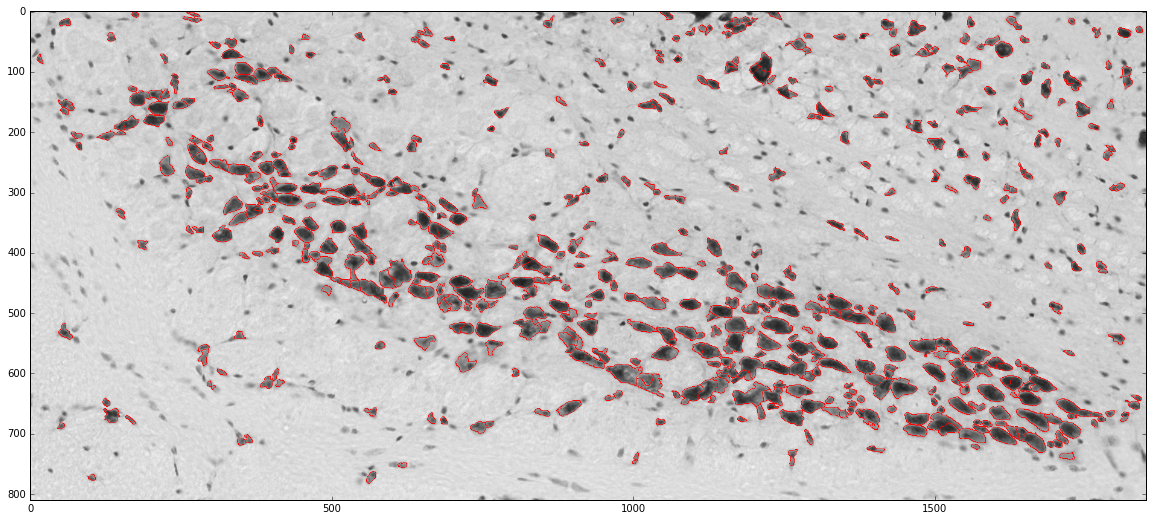

In [52]:
plt.figure(figsize=(20,20));
plt.imshow(im_boundaryMarked);